In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Gun Violence Dataset in US.csv')

# Drop Operations column because it is empty
df = df.drop(columns=['Operations'])

# Replace any empty cells with value of "NULL"
df.fillna("NULL", inplace = True)

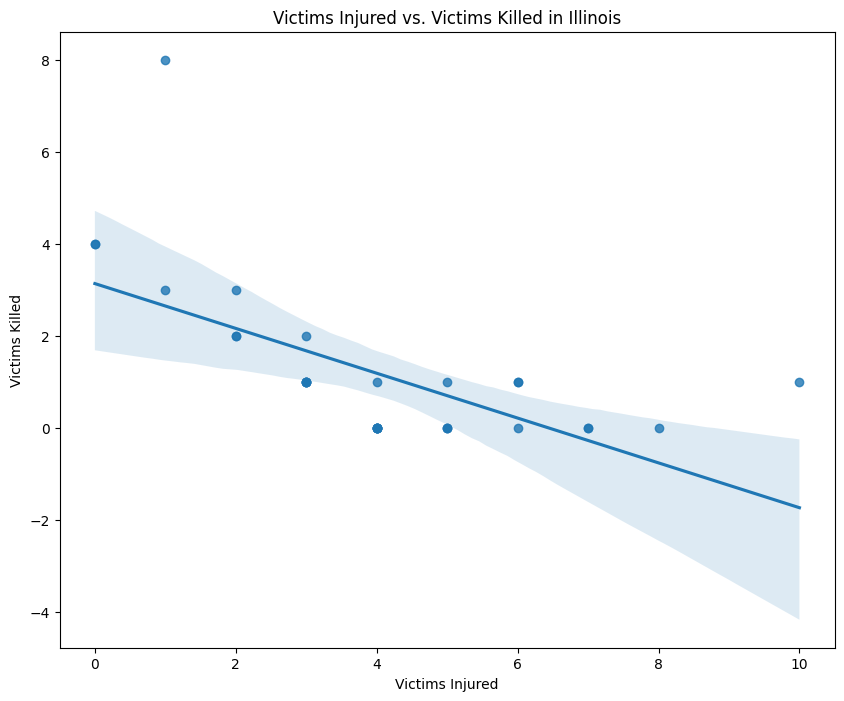

In [ ]:
# Can we predict victims injured vs victims killed for the state with the most incidents?

# Regression plot for state with most data (Illinois) comparing victims injured vs victims killed

# Finds which state has the most data
most_common_state = df['State'].value_counts().idxmax()
# print(most_common_state)

# Filter data for the state with the most data
state_data = df[df['State'] == most_common_state]
# print(state_data)

# Create the regression plot
plt.figure(figsize=(10, 8))
sns.regplot(x = 'Victims Injured', y = 'Victims Killed', data = state_data)
plt.title(f'Victims Injured vs. Victims Killed in {most_common_state}')
plt.xlabel('Victims Injured')
plt.ylabel('Victims Killed')
plt.show()

In [ ]:
# Can we predict whether an event will result in high casualties based on the state and month?
# A simple binary classifier to detect high casualty
# events based on the State and Month
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Temp dataframe to avoid messing up the actual one
temp_df = df.copy()

casualty_thresh = 4 # More than 4 kills + injuries = highcasualty (1 or 0 binary)
temp_df['High_Casualty'] = (temp_df['Victims Injured'] + temp_df['Victims Killed'] > casualty_thresh).astype(int)

# Only month column to reduce complexity of dates (also as a number).
temp_df['Month'] = pd.to_datetime(temp_df['Incident Date']).dt.month

# Encode states as value so we can run logistic regression on them
le = LabelEncoder()
temp_df['State_Encoded'] = le.fit_transform(temp_df['State'])

# Predictors are Month + State Encoded and Prediction
X = temp_df[['Month', 'State_Encoded']]
y = temp_df['High_Casualty']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Test
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# Manual Test (pick month & state)
month_input = 10
state_input = "Illinois"

# Encode the state
state_input = le.transform([state_input])[0]

# Predict
test_input = pd.DataFrame([[month_input, state_input]], columns=['Month', 'State_Encoded'])
prediction = model.predict(test_input)
result = "High Casualty" if prediction[0] == 1 else "Low Casualty"
print(f"Prediction: {result}")


Accuracy: 0.5813953488372093
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.55      0.62        53
           1       0.47      0.64      0.54        33

    accuracy                           0.58        86
   macro avg       0.59      0.59      0.58        86
weighted avg       0.61      0.58      0.59        86

Prediction: High Casualty


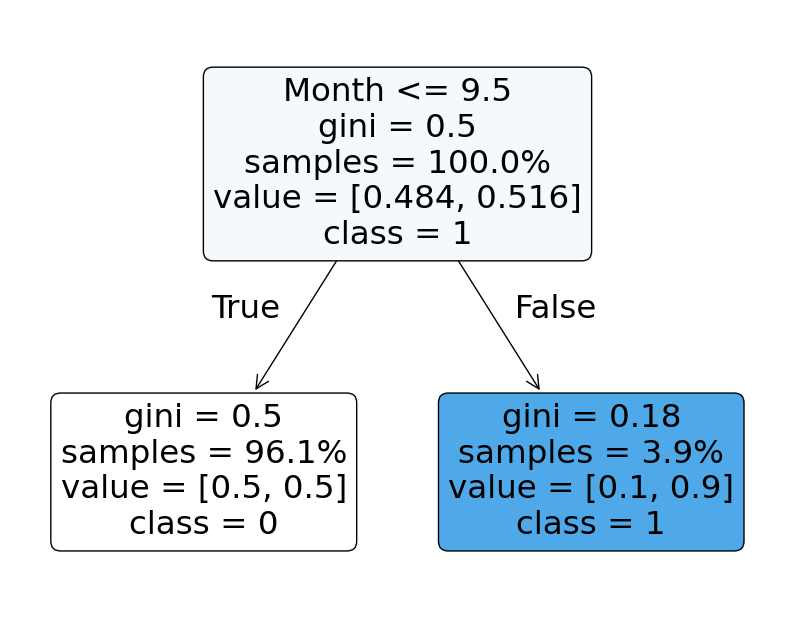

In [ ]:
# Depending on the amount of victims injured or killed in an incident, is the event high or low casualty?

#Create Classification Tree

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Try to re use previous cell or create a new one

try:
  temp_df['Month']
except KeyError:
  temp_df = df.copy()

  casualty_thresh = 4 # More than 4 kills + injuries = highcasualty (1 or 0 binary)
  temp_df['High_Casualty'] = (temp_df['Victims Injured'] + temp_df['Victims Killed'] > casualty_thresh).astype(int)


# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

# Create a classification tree from the training data
clf = tree.DecisionTreeClassifier(min_samples_split=20, ccp_alpha=0.01)
model = clf.fit(X_train, y_train)

#Plot confusion matrix

plt.figure(figsize=(10, 8))
tree.plot_tree(model, feature_names=X.columns, label='all', impurity=True, # Change label to 'all', 'none', or 'root'
               class_names=["0", "1"], rounded=True, filled=True, proportion=True)
plt.show()